In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read the csv
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Intern Research/Data/final_data_intern_research.csv")
data.head()

,Timestamp,Your Gender,Employment Type,Department,Years in Company,Individual - Performance [Knowledge sharing techniques in the organization increase my work efficiency.],Individual - Performance [Knowledge sharing techniques in the organization help me to solve problems at work.],Individual - Performance [Knowledge sharing techniques in the organization help me to accomplish my work],Individual - Performance [Knowledge sharing techniques in the organization increase my problem-solving abilities.],Individual - Learning & Capacity [I often develop new procedures to improve my everyday practice with the help of knowledge sharing activities.],...,"Organizational - Learning & Innovations [All in all, I believe that knowledge sharing helps to improve the organizational innovative capabilities.]",Organizational - Business Process Efficiency [Effective knowledge sharing is a significant competitive advantage for the company.],Organizational - Business Process Efficiency [I believe that knowledge sharing helps to increase the productivity of the organization.],Organizational - Business Process Efficiency [I believe that knowledge sharing helps to maintain effective customer relationship with the organization.],Organizational - Business Process Efficiency [I believe that knowledge sharing helps to improve the effective communication between departments.],"Organizational - Business Process Efficiency [All in all, I believe that knowledge sharing helps to increase the overall organizational effectiveness.]","Knowledge Sharing Within Organization. [I frequently do share /exchange the following with my colleagues: Reports, official documents; Manuals, methodologies, models; know-where, know-whom; Experience, know-how; Expertise from education and training.]",Knowledge Sharing Within Organization. [The opportunities to share knowledge within the organization are sufficient.],Knowledge Sharing Within Organization. [There are valid processes/channels to share knowledge between different departments.],"Knowledge Sharing Within Organization. [I always share knowledge with colleagues inside my department, outside my department and with customers.]"
0,11/9/2022 17:31:59,Female,Full Time,Engineering,1.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral,Agree
1,11/11/2022 18:06:10,Male,Full Time,Engineering,3.0,Agree,Agree,Agree,Agree,Neutral,...,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Neutral,Agree,Agree,Neutral
2,11/11/2022 18:34:48,Female,Full Time,Engineering,1.0,Neutral,Neutral,Neutral,Agree,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3,11/11/2022 19:45:47,Male,Full Time,Engineering,2.0,Agree,Strongly Agree,Agree,Strongly Agree,Agree,...,Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Neutral
4,11/17/2022 7:18:10,Female,Full Time,Marketing,1.0,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree


In [3]:
#remove timestamps
data.drop("Timestamp", axis = 1, inplace = True)

In [4]:
def scaling(x):
  if x == "Strongly Disagree":
    x = 1
  elif x == "Disagree":
    x = 2
  elif x == "Neutral":
    x = 3
  elif x == "Agree":
    x = 4
  elif x == "Strongly Agree":
    x = 5
  return x

#scaling the strongly disagree, disagree, neutral, agree, strongly agree to scale values
data = data.applymap(scaling)

In [5]:
#new data
data.head()

,Your Gender,Employment Type,Department,Years in Company,Individual - Performance [Knowledge sharing techniques in the organization increase my work efficiency.],Individual - Performance [Knowledge sharing techniques in the organization help me to solve problems at work.],Individual - Performance [Knowledge sharing techniques in the organization help me to accomplish my work],Individual - Performance [Knowledge sharing techniques in the organization increase my problem-solving abilities.],Individual - Learning & Capacity [I often develop new procedures to improve my everyday practice with the help of knowledge sharing activities.],Individual - Learning & Capacity [I clearly know how my job should be performed with the help of knowledge sharing.],...,"Organizational - Learning & Innovations [All in all, I believe that knowledge sharing helps to improve the organizational innovative capabilities.]",Organizational - Business Process Efficiency [Effective knowledge sharing is a significant competitive advantage for the company.],Organizational - Business Process Efficiency [I believe that knowledge sharing helps to increase the productivity of the organization.],Organizational - Business Process Efficiency [I believe that knowledge sharing helps to maintain effective customer relationship with the organization.],Organizational - Business Process Efficiency [I believe that knowledge sharing helps to improve the effective communication between departments.],"Organizational - Business Process Efficiency [All in all, I believe that knowledge sharing helps to increase the overall organizational effectiveness.]","Knowledge Sharing Within Organization. [I frequently do share /exchange the following with my colleagues: Reports, official documents; Manuals, methodologies, models; know-where, know-whom; Experience, know-how; Expertise from education and training.]",Knowledge Sharing Within Organization. [The opportunities to share knowledge within the organization are sufficient.],Knowledge Sharing Within Organization. [There are valid processes/channels to share knowledge between different departments.],"Knowledge Sharing Within Organization. [I always share knowledge with colleagues inside my department, outside my department and with customers.]"
0,Female,Full Time,Engineering,1.0,5,5,5,5,3,4,...,4,4,4,4,4,4,4,4,3,4
1,Male,Full Time,Engineering,3.0,4,4,4,4,3,4,...,4,4,5,4,5,4,3,4,4,3
2,Female,Full Time,Engineering,1.0,3,3,3,4,3,3,...,3,3,3,3,3,3,3,3,3,3
3,Male,Full Time,Engineering,2.0,4,5,4,5,4,4,...,4,5,4,4,5,5,4,4,5,3
4,Female,Full Time,Marketing,1.0,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [6]:
#save the likert scale values
data.to_csv("/content/drive/MyDrive/Intern Research/Data/final_data_likertscale.csv", index = False)
print("CSV is saved")

CSV is saved


### Data Analysis

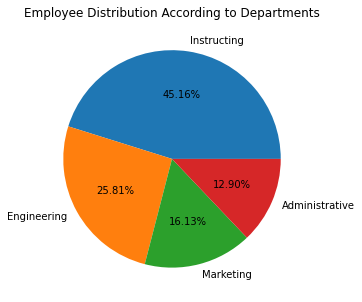

In [30]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure(figsize = (5,5))
s = data['Department'].value_counts()
label = list(s.index)
counts = list(s.values)
plt.pie(counts, labels = label,autopct='%1.2f%%')
plt.title("Employee Distribution According to Departments")
plt.show()

### Feature Engineering

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 43 columns):
 #   Column                                                                                                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                       --------------  -----  
 0   Your Gender                                                                                                                                                                                                                                                  31 non-null     object 
 1   Employment Type                               

In [8]:
#getting the mean of the likert scale columns
import numpy as np
def mean_score(row):
  global main_cols
  main_cols = list(data.columns[4:])
  a1 = np.array([row[main_cols[i]] for i in range(0,4)])
  row["Individual Performance"] = a1.mean()
  a2 = np.array([row[main_cols[i]] for i in range(4,9)])
  row["Individual learning & capacity"] = a2.mean()
  a3 = np.array([row[main_cols[i]] for i in range(9,13)])
  row["Individual Psychological Effect"] = a3.mean()
  a4 = np.array([row[main_cols[i]] for i in range(13,18)])
  row["Team Performance"] = a4.mean()
  a5 = np.array([row[main_cols[i]] for i in range(18,22)])
  row["Team Creativity"] = a5.mean()
  a6 = np.array([row[main_cols[i]] for i in range(22,26)])
  row["Team Climate"] = a6.mean()
  a7 = np.array([row[main_cols[i]] for i in range(26,30)])
  row["Org - Learning&Innovation"] = a7.mean()
  a8 = np.array([row[main_cols[i]] for i in range(30,35)])
  row["Org - Business Process Efficiency"] = a8.mean()
  a9 = np.array([row[main_cols[i]] for i in range(35,39)])
  row["Knowledge Sharing"] = a9.mean()

  return row

data = data.apply(mean_score, axis = 1)
data.head()

,Your Gender,Employment Type,Department,Years in Company,Individual - Performance [Knowledge sharing techniques in the organization increase my work efficiency.],Individual - Performance [Knowledge sharing techniques in the organization help me to solve problems at work.],Individual - Performance [Knowledge sharing techniques in the organization help me to accomplish my work],Individual - Performance [Knowledge sharing techniques in the organization increase my problem-solving abilities.],Individual - Learning & Capacity [I often develop new procedures to improve my everyday practice with the help of knowledge sharing activities.],Individual - Learning & Capacity [I clearly know how my job should be performed with the help of knowledge sharing.],...,"Knowledge Sharing Within Organization. [I always share knowledge with colleagues inside my department, outside my department and with customers.]",Individual Performance,Individual learning & capacity,Individual Psychological Effect,Team Performance,Team Creativity,Team Climate,Org - Learning&Innovation,Org - Business Process Efficiency,Knowledge Sharing
0,Female,Full Time,Engineering,1.0,5,5,5,5,3,4,...,4,5.00,3.8,4.00,4.0,3.0,4.5,4.0,4.0,3.75
1,Male,Full Time,Engineering,3.0,4,4,4,4,3,4,...,3,4.00,3.8,4.00,4.0,4.0,4.0,4.0,4.4,3.50
2,Female,Full Time,Engineering,1.0,3,3,3,4,3,3,...,3,3.25,3.0,3.25,3.0,3.0,3.5,3.0,3.0,3.00
3,Male,Full Time,Engineering,2.0,4,5,4,5,4,4,...,3,4.50,4.4,4.00,4.6,4.5,4.5,4.5,4.6,4.00
4,Female,Full Time,Marketing,1.0,4,4,4,4,4,4,...,4,4.00,4.0,4.00,4.0,4.0,4.0,4.0,4.0,4.00


In [9]:
#dropping the likert scale features
data.drop(main_cols, axis = 1, inplace = True)

In [10]:
#data set
data.head()

,Your Gender,Employment Type,Department,Years in Company,Individual Performance,Individual learning & capacity,Individual Psychological Effect,Team Performance,Team Creativity,Team Climate,Org - Learning&Innovation,Org - Business Process Efficiency,Knowledge Sharing
0,Female,Full Time,Engineering,1.0,5.00,3.8,4.00,4.0,3.0,4.5,4.0,4.0,3.75
1,Male,Full Time,Engineering,3.0,4.00,3.8,4.00,4.0,4.0,4.0,4.0,4.4,3.50
2,Female,Full Time,Engineering,1.0,3.25,3.0,3.25,3.0,3.0,3.5,3.0,3.0,3.00
3,Male,Full Time,Engineering,2.0,4.50,4.4,4.00,4.6,4.5,4.5,4.5,4.6,4.00
4,Female,Full Time,Marketing,1.0,4.00,4.0,4.00,4.0,4.0,4.0,4.0,4.0,4.00


In [11]:
#save the data set
data.to_csv("/content/drive/MyDrive/Intern Research/Data/final_data_with_means.csv", index = False)

### Corrlation Analysis

In [12]:
#columns
print(data.columns)
wanted_cols = list(data.columns)[4:]

#wanted data
final_data = data[wanted_cols]

Index(['Your Gender', 'Employment Type', 'Department', 'Years in Company',
       'Individual Performance', 'Individual learning & capacity',
       'Individual Psychological Effect', 'Team Performance',
       'Team Creativity', 'Team Climate', 'Org - Learning&Innovation',
       'Org - Business Process Efficiency', 'Knowledge Sharing'],
      dtype='object')


In [13]:
final_data.head()

,Individual Performance,Individual learning & capacity,Individual Psychological Effect,Team Performance,Team Creativity,Team Climate,Org - Learning&Innovation,Org - Business Process Efficiency,Knowledge Sharing
0,5.00,3.8,4.00,4.0,3.0,4.5,4.0,4.0,3.75
1,4.00,3.8,4.00,4.0,4.0,4.0,4.0,4.4,3.50
2,3.25,3.0,3.25,3.0,3.0,3.5,3.0,3.0,3.00
3,4.50,4.4,4.00,4.6,4.5,4.5,4.5,4.6,4.00
4,4.00,4.0,4.00,4.0,4.0,4.0,4.0,4.0,4.00


In [14]:
#mean and standdard deviation values
all_data = []

for col in final_data.columns:
  row = []
  mean = final_data[col].mean()
  std = final_data[col].std()
  row.extend([col, mean, std])
  all_data.append(row)

mean_std = pd.DataFrame(all_data, columns = ["Variables","Mean", "Standard Deviation"])
mean_std.to_csv("/content/drive/MyDrive/Intern Research/Data/means_std.csv")
mean_std.head()

,Variables,Mean,Standard Deviation
0,Individual Performance,3.911290,0.568435
1,Individual learning & capacity,3.683871,0.531097
2,Individual Psychological Effect,3.725806,0.575018
3,Team Performance,4.000000,0.521536
4,Team Creativity,3.927419,0.517178


In [15]:
all_data

[['Individual Performance', 3.911290322580645, 0.5684349387308036],
 ['Individual learning & capacity', 3.6838709677419352, 0.531097463869893],
 ['Individual Psychological Effect', 3.725806451612903, 0.5750175312895448],
 ['Team Performance', 4.000000000000001, 0.521536192416212],
 ['Team Creativity', 3.9274193548387095, 0.5171780334464815],
 ['Team Climate', 4.266129032258065, 0.39229816398036527],
 ['Org - Learning&Innovation', 3.8951612903225805, 0.417203954661202],
 ['Org - Business Process Efficiency', 4.180645161290323, 0.45710637335213317],
 ['Knowledge Sharing', 4.040322580645161, 0.6834251184095579]]

In [16]:
#correlations
final_data.corr()

,Individual Performance,Individual learning & capacity,Individual Psychological Effect,Team Performance,Team Creativity,Team Climate,Org - Learning&Innovation,Org - Business Process Efficiency,Knowledge Sharing
Individual Performance,1.000000,0.682429,0.534986,0.393533,0.253746,0.249534,0.433853,0.461417,0.283014
Individual learning & capacity,0.682429,1.000000,0.634478,0.466930,0.502261,0.321267,0.214009,0.457271,0.463328
Individual Psychological Effect,0.534986,0.634478,1.000000,0.255647,0.379200,0.398915,0.232232,0.454703,0.357756
Team Performance,0.393533,0.466930,0.255647,1.000000,0.531401,0.407303,0.337030,0.520140,0.448895
Team Creativity,0.253746,0.502261,0.379200,0.531401,1.000000,0.457772,0.455984,0.649513,0.485990
Team Climate,0.249534,0.321267,0.398915,0.407303,0.457772,1.000000,0.201611,0.512984,0.277233
Org - Learning&Innovation,0.433853,0.214009,0.232232,0.337030,0.455984,0.201611,1.000000,0.592026,0.307587
Org - Business Process Efficiency,0.461417,0.457271,0.454703,0.520140,0.649513,0.512984,0.592026,1.000000,0.445393
Knowledge Sharing,0.283014,0.463328,0.357756,0.448895,0.485990,0.277233,0.307587,0.445393,1.000000


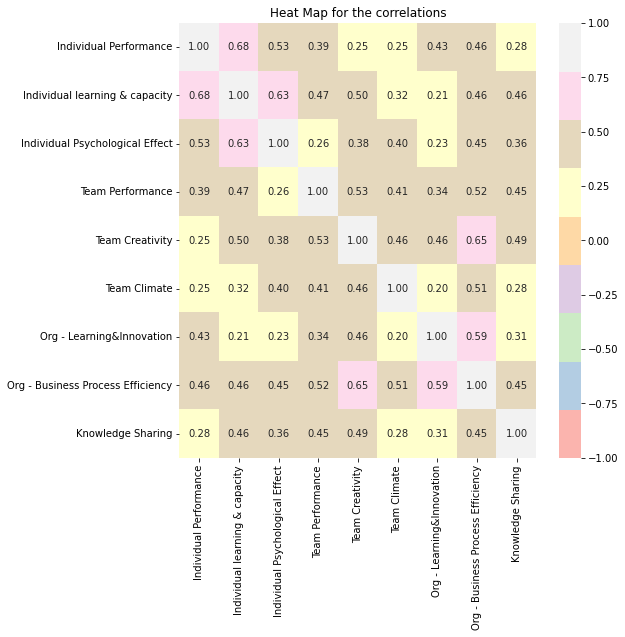

In [17]:
#correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,8))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1, cmap = "Pastel1")
plt.title("Heat Map for the correlations")
plt.show()

In [18]:
#point biserial correlation
from scipy import stats
all_vars = []
var1 = final_data['Knowledge Sharing'].values
for column in final_data.columns:
  if column == "Knowledge Sharing":
    continue
  rows = []
  rows.append(column)
  var2 = final_data[column].values
  corr = stats.pearsonr(var2, var1)
  rows.append(corr[0])
  rows.append(corr[1])
  print(column,corr[1])
  all_vars.append(rows)

corr_data = pd.DataFrame(all_vars, columns = ["Main Variable", "Correlation with Dependent Variables","P-value"])
corr_data.to_csv("/content/drive/MyDrive/Intern Research/Data/pearson-correlation.csv", index = False)
corr_data.head(8)

Individual Performance 0.12289414660410618
Individual learning & capacity 0.008664746830017701
Individual Psychological Effect 0.048155346427711486
Team Performance 0.011307075367806473
Team Creativity 0.005574414525107916
Team Climate 0.13106626995188805
Org - Learning&Innovation 0.09232022685375862
Org - Business Process Efficiency 0.012041481288478326


,Main Variable,Correlation with Dependent Variables,P-value
0,Individual Performance,0.283014,0.122894
1,Individual learning & capacity,0.463328,0.008665
2,Individual Psychological Effect,0.357756,0.048155
3,Team Performance,0.448895,0.011307
4,Team Creativity,0.485990,0.005574
5,Team Climate,0.277233,0.131066
6,Org - Learning&Innovation,0.307587,0.092320
7,Org - Business Process Efficiency,0.445393,0.012041


### Regression Analysis

In [19]:
independent_cols = list(final_data.columns)
independent_cols.remove('Knowledge Sharing')
print(independent_cols)

['Individual Performance', 'Individual learning & capacity', 'Individual Psychological Effect', 'Team Performance', 'Team Creativity', 'Team Climate', 'Org - Learning&Innovation', 'Org - Business Process Efficiency']


In [90]:
#regression analysis
# importing libraries
import statsmodels.api as sm
 
# defining the dependent and independent variables
independent_cols = ['Individual Performance', 
                    'Individual learning & capacity', 
                    'Individual Psychological Effect', 
                    'Team Performance', 
                    'Team Creativity', 
                    'Team Climate', 
                    'Org - Learning&Innovation', 
                    'Org - Business Process Efficiency']
# independent_cols.remove("Team Climate")
# independent_cols.remove("Individual Psychological Effect")
# independent_cols.remove("Team Creativity")
# independent_cols.remove("Org - Business Process Efficiency")
# independent_cols.remove("Individual Performance")
# independent_cols.remove("Org - Learning&Innovation")
independent_cols = independent_cols[7]
print(independent_cols)

ytrain = final_data[independent_cols]
Xtrain = final_data[['Knowledge Sharing']]

Xtrain = sm.add_constant(Xtrain)
  
# building the model and fitting the data
lin_reg = sm.OLS(ytrain, Xtrain).fit()

Org - Business Process Efficiency


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
#summary
print(lin_reg.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Org - Business Process Efficiency   R-squared:                       0.198
Model:                                           OLS   Adj. R-squared:                  0.171
Method:                                Least Squares   F-statistic:                     7.177
Date:                               Thu, 12 Jan 2023   Prob (F-statistic):             0.0120
Time:                                       02:42:37   Log-Likelihood:                -15.784
No. Observations:                                 31   AIC:                             35.57
Df Residuals:                                     29   BIC:                             38.44
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t